# KPI for invoice preparation time

In [1]:
import matplotlib.axes as axes
import datasense as ds
import pandas as pd
import numpy as np

/usr/lib/python3.10/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
fig_title = 'Invoicing cycle time'
ax_title = 'Start of invoice to invoice sent'
ylabel = 'Time (min)'
date_column = 'Date'
invoice_start_column = 'Start invoice'
invoice_send_column = 'Send invoice'
total_time_column = 'Total time'
data_file_name = 'invoice_preparation_time.csv'

In [4]:
def main():
    invoicing = pd.read_csv(
        data_file_name,
        parse_dates=[date_column]
    )
    invoicing = calculate_cycle_time(
        df=invoicing,
        date_column=date_column,
        invoice_start_column=invoice_start_column,
        invoice_send_column=invoice_send_column,
        total_time_column=total_time_column
    )
    fig, ax = ds.plot_line_x_y(
        X=invoicing[date_column],
        y=invoicing[total_time_column]
    )
    ds.despine(ax=ax)
    fig.suptitle(t=fig_title)
    ax.set_title(ax_title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(date_column)
    fig.savefig(
        fname='invoice_cycle_time.svg',
        format='svg'
    )

In [5]:
def calculate_cycle_time(
        df: pd.DataFrame,
        date_column: str,
        invoice_start_column: str,
        invoice_send_column: str,
        total_time_column: str
        ) -> pd.DataFrame:
    """
    Calculate cycle time with two columns, store in third column
    """
    df[invoice_start_column] = pd.to_datetime(
        df[invoice_start_column],
        format='%H:%M'
    )
    df[invoice_send_column] = pd.to_datetime(
        df[invoice_send_column],
        format='%H:%M'
    )
    df[total_time_column] = (
        df[invoice_send_column] - df[invoice_start_column]
    )
    # This creates a timedelta column of minutes
    df[total_time_column] = df[total_time_column] / np.timedelta64(1, 'm')
    # This creates an integer column of minutes
    # df[total_time_column] = df[total_time_column].dt.components['minutes']
    return df

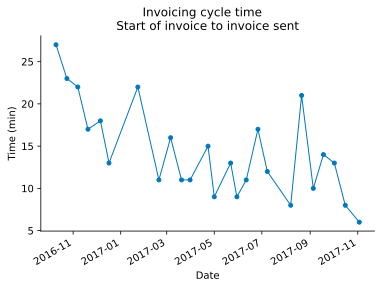

In [6]:
if __name__ == '__main__':
    main()